In [1]:
#importing libraries required for this project
import numpy as np
import pandas as pd #storing the csv file as pandas dataframe, easier to analyse data with
import matplotlib.pyplot as plt #visulaising data
import seaborn as sns #visualsing data
from sklearn.cluster import KMeans #Kmeans algorithm


In [2]:
#DATA COLLECTION AND ANALYSIS
data = pd.read_csv('Mall_Customers.csv')#loading the data from csv file to a pandas dataframe

In [3]:
#Basic data reading, checking data structure
data.head() # here we can see the dataset has 5 columns

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape # gives us the customer data rows and columns, basic information about our data frame

(200, 5)

We have 200 rows and 5 columns. Represents a decent data size

In [5]:
data.info() # gives us more information about our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


We do not have any missing/null values

In [6]:
#To further check missing values in the dataset. We check for number of missing values in each column
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


As confimed there is no missing values.

Out of each column, only Annual Income and Spending score have suitable use to segment the customer on. Gender, Age, Custimer ID are not suitable to cluster the customer on. Those are not appropriate categories for malls to segment their customers on.

In [7]:
#extracting the two columns using sliciing and iloc. Iloc enables us to select rows and columns by their index in dataframes
#iloc syntax is iloc[rows, columns]
AI_SS = data.iloc[:,[3,4]].values #We select every row and the fourth and fifth column and store those values in our varibale AI_SS


AI_sS stores annual income and spedning score, so we store annual income in X axis and Spedning score in Y axis.
Now, we find the optimum number of clusters required for our dataset

To find optimum number of clusters, we use WCSS (Within cluster sum of squares) WCSS is a measure used in clustering algorithm. Helps to determine optimal number of clusters for our given data. It calculates the sum of squares of the distance between each data point and the centroid of the cluster it belongs to.
Using KMeans algorithm, we calculate WCSS for K ranging from 1 to any upper limit, typically 10,20
Then, We plot the WCSS number next to the K value it belongs to. This is an elbow plot
We look for the elbow in the plot, which is the point from which adding more clusters gives us diminishig return.
The cluster at the elbow point is the optimal number of cluster needed for our dataset

In [8]:
#finding elbow point, for k ranging from 1 to 10
wcss = [] #empty list to store WCSS values for each cluster
for k in range (1,11):
  Kmeans = KMeans(n_clusters=k,init = 'k-means++', random_state = 40)#the init parameter helps initialise the centroids of the cluster, k++ spreads out initial cluster centeres to be distant from each other for better clustering result. This mehtod speeds up convergance. Random state selects the cnetroids randomly,also ensures that data is split the same way everytime.
  Kmeans.fit(AI_SS) # we apply the KMeans algorithm into our dataset containing the annual income and spending score varibale.This returns the WCSS value

  wcss.append(Kmeans.inertia_) #Kmeans.inertia_ contains wcss for the current k value in the loop and we append that in the wcss list with the k value attached to the WCSS value, inertia means WCSS


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

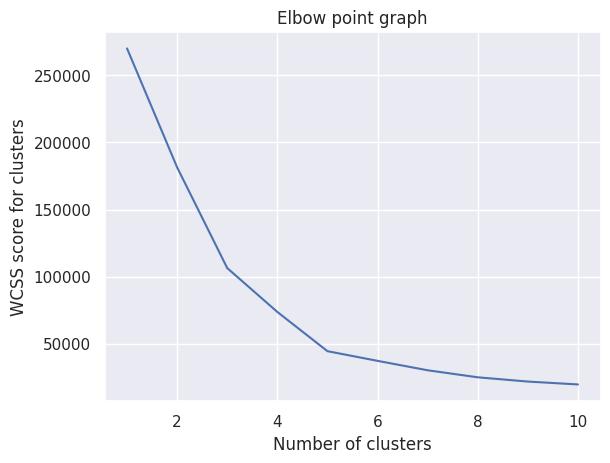

In [9]:
#plotting the elbow graph to check for optimality
sns.set() # lays out basic parameters required by graph
plt.plot(range(1,11), wcss)# (x axis, y axis)
plt.title('Elbow point graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS score for clusters')
plt.show()

The two stationary points on our graph is around 3 and at 5, as there is much more of a significant drop at 5 than 3, and that there are no stationary points/drop in WCSS after 5. We select 5 as the number of clusters. Optimal number of cluster is 5


We will now train the KMeans clustering model with 5 clusters, same method except now we can set the number of clusters as 5.

In [10]:
Kmeans = KMeans(n_clusters=5,init = 'k-means++', random_state = 1)
#each cluster will have a cluster number, and each of the 200 data will belong to one of the cluster number. We return the label given to each data
y_kmeans = Kmeans.fit_predict(AI_SS) #after fitting the k means algorithm to the dataset, .fit_predict assigns each data point the cluster number it belongs to
print(y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 1 3 0 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3 0 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


These are the cluster number each data point belongs to.
Now, we plot the clusters and see it

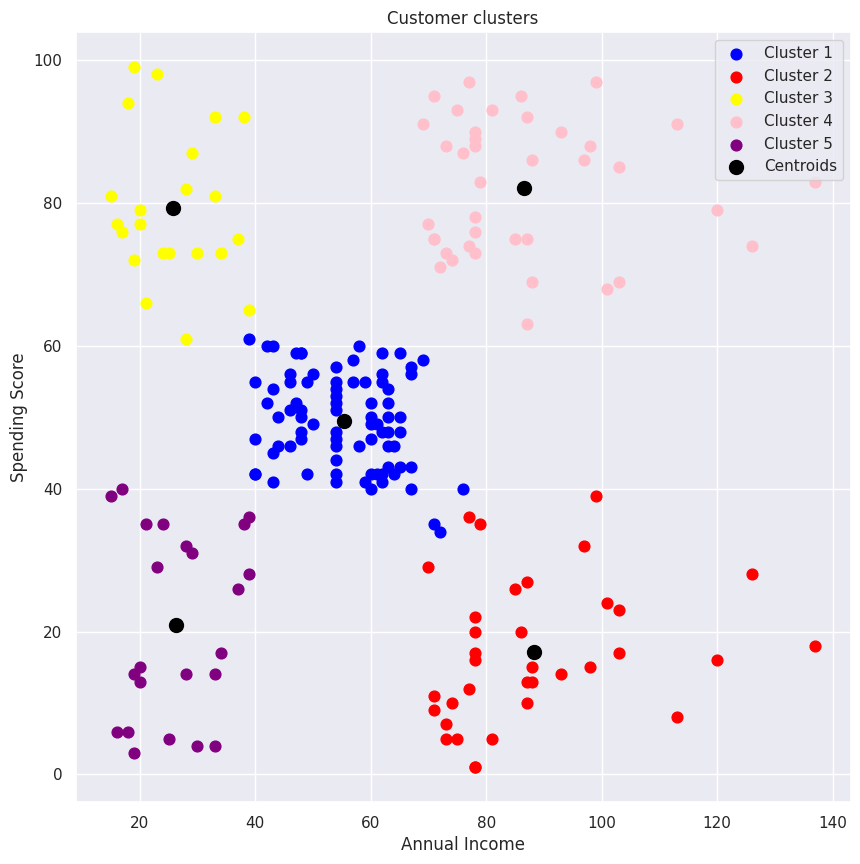

In [11]:
#Plotting all the 5 centroid and clusters
plt.figure(figsize=(10,10)) # size of our plot
#plotting each cluster as a scatterplot, using .scatter. Syntax: .scatter(AI_SS[y_kmeans=Cluster number, column number from AI_SS], AI_SS[y_kmeans = Cluster number, column number], s= , c ='',label='')
# for each column in AI_SS, the .scatter function selects the data points with the corresponding cluster number
#s, selects size of the scatter point, c sets the color of the scatter point, label sets the label of the data point in the legend
plt.scatter(AI_SS[y_kmeans == 0, 0], AI_SS[y_kmeans == 0, 1], s = 60, c = 'blue', label = 'Cluster 1')
plt.scatter(AI_SS[y_kmeans== 1,0],AI_SS[y_kmeans == 1, 1], s = 60, c = 'red', label = 'Cluster 2')
plt.scatter(AI_SS[y_kmeans == 2, 0], AI_SS[y_kmeans == 2, 1], s = 60, c = 'yellow', label = 'Cluster 3')
plt.scatter(AI_SS[y_kmeans == 3, 0], AI_SS[y_kmeans == 3, 1], s = 60, c = 'pink', label = 'Cluster 4')
plt.scatter(AI_SS[y_kmeans == 4, 0], AI_SS[y_kmeans == 4, 1], s = 60, c = 'purple', label = 'Cluster 5')
#plotting the centroid
#.cluster_centers_ returns the coordinates of the centroid for each , [:,0] selects all the centroid for x axis, and [:,1] selects all the centroid for y axis
plt.scatter(Kmeans.cluster_centers_[:,0], Kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.title('Customer clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend() #sets legend based on label parameters, helps identify different labels
plt.show()

Analysing the clusters:
It is apparent that the purple cluster, cluster 5 are shoppers with low income and low spending score
However, the yellow cluster, cluster 3 have low income but high spending score.
The blue cluster, cluster 1 have median income and spending score
The red cluster, cluster 2 have high income but lower spending score
The pink cluster, sluter 4 have high income and also a high spending score.


Using these clusters, the mall can strategise their marketing and discount model catered to different cluster, to either urge them to spend more or to maintain their spending score. They could send more newsletters to the higher spending clusters: 3 and 4. And could give more discounts to cluster 5 and 2 to increase speding and customer satisfaction.